In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
logins_data = pd.read_json("logins.json")

In [3]:
logins_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


# PART 1 - Exploratory data analysis

In [ ]:
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 
Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 
Please report/illustrate important features of the demand, such as daily cycles. 
If there are data quality issues, please report them.

In [23]:
logins_data['login_time'] = pd.to_datetime(logins_data['login_time'])

In [24]:
# sort the values chronoligically

logins_data = logins_data.sort_values('login_time')

In [25]:
# 2. Create a Complete Time Index

full_range = pd.date_range(start = logins_data['login_time'].min(),
                          end = logins_data['login_time'].max(),
                          freq='15min')

In [26]:
# drop duplicates
actual_intervals = logins_data['login_time'].drop_duplicates()

# The missing number of minutes in the date range
missing = full_range.difference(actual_intervals)
print(len(missing))

9694


In [27]:
# verifying the data type
logins_data['login_time'].dtype

dtype('<M8[ns]')

In [28]:
#3. Compare with Actual Timestamps
logins_data['floor'] = logins_data

In [29]:
logins_data.set_index("login_time", inplace=True)

In [30]:
minutes_time = logins_data.resample('15min').size()

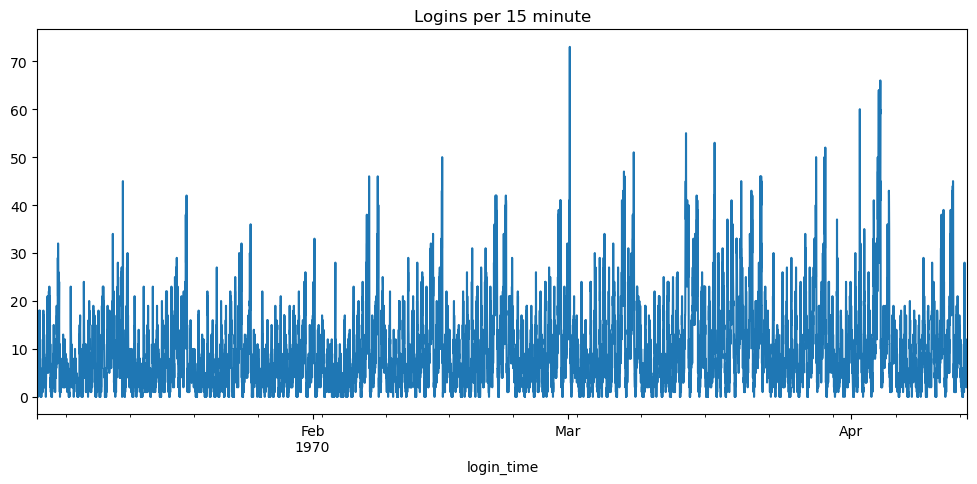

In [39]:
plt.figure(figsize=(12, 5))
minutes_time.plot(title= 'Logins per 15 minute')
plt.show()

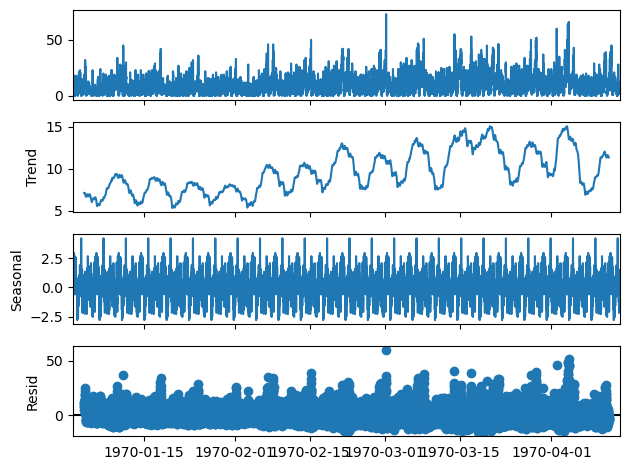

In [51]:
seasonal_result = seasonal_decompose(minutes_time, model='additive', period=400)
seasonal_result.plot()
plt.show()

In [53]:
model = ARIMA(minutes_time, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9788
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -28507.355
Date:                Fri, 17 Oct 2025   AIC                          57022.710
Time:                        19:18:16   BIC                          57051.465
Sample:                    01-01-1970   HQIC                         57032.453
                         - 04-13-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0577      0.038     -1.534      0.125      -0.131       0.016
ar.L2         -0.0255      0.017     -1.497      0.134      -0.059       0.008
ma.L1         -0.3710      0.038     -9.787      0.0

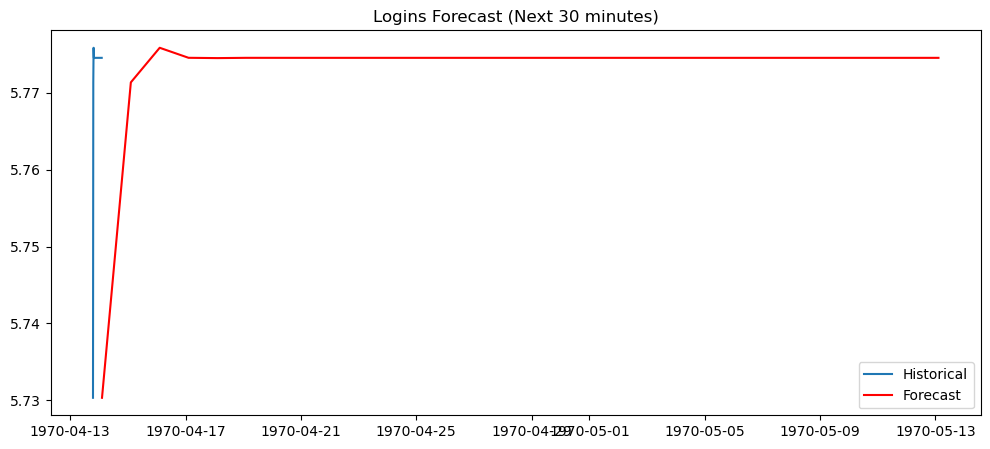

In [61]:
minutes_time = model_fit.forecast(steps=30)
minutes_time_minutes = pd.date_range(minutes_time.index[-1] + pd.Timedelta(minutes=15), periods=30)

plt.figure(figsize=(12, 5))
plt.plot(minutes_time, label="Historical")
plt.plot(minutes_time_minutes, minutes_time, label="Forecast", color="red")
plt.title("Logins Forecast (Next 30 minutes)")
plt.legend()
plt.show()

In [59]:
# Forecast
forecast_values = model_fit.forecast(steps=30)

# Time index for forecast
forecast_index = pd.date_range(start=minutes_time.index[-1] + pd.Timedelta(minutes=15), periods=30, freq='15min')

# Combine for plotting
historical = minutes_time

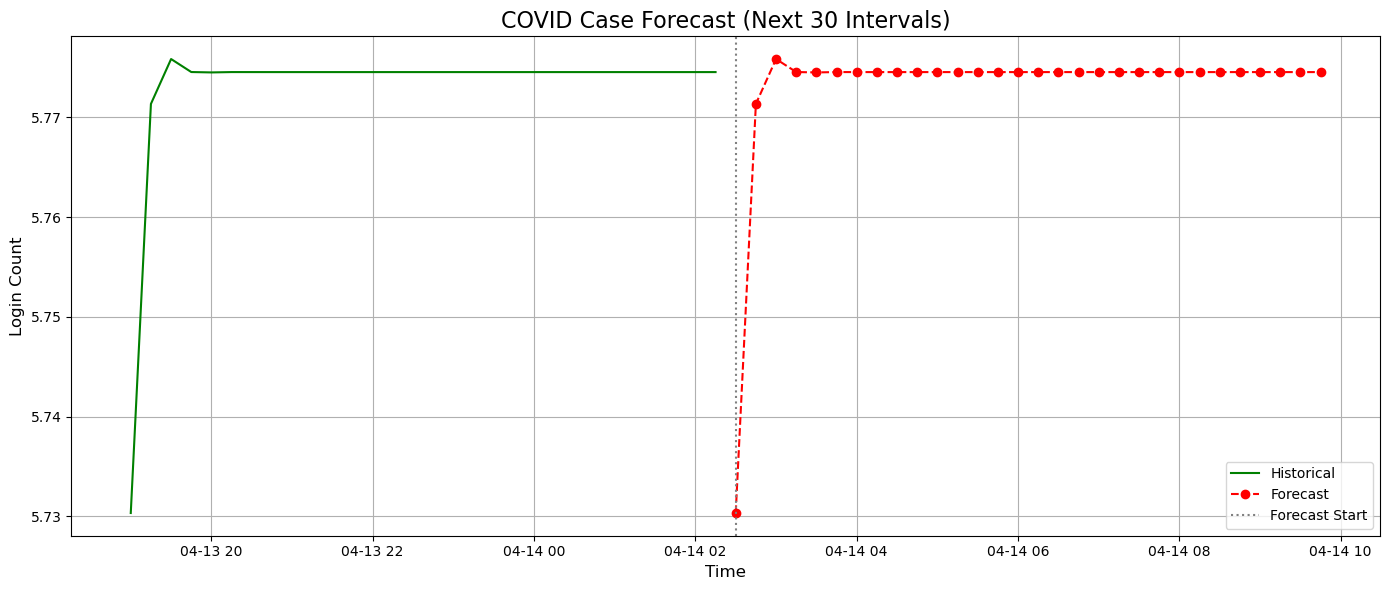

In [60]:
plt.figure(figsize=(14, 6))

# Historical data
plt.plot(historical.index, historical.values, label="Historical", color="green")

# Forecast data
plt.plot(forecast_index, forecast_values, label="Forecast", color="red", linestyle='--', marker='o')

# Highlight forecast start
plt.axvline(x=forecast_index[0], color='gray', linestyle=':', label='Forecast Start')

# Labels and title
plt.title("COVID Case Forecast (Next 30 Intervals)", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Login Count", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PART 2

In [64]:
ultimate_data = pd.read_json("ultimate_data_challenge.json")

In [65]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [66]:
ultimate_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [67]:
ultimate_data.describe(include=['object','category'])

,city,signup_date,last_trip_date,phone
count,50000,50000,50000,49604
unique,3,31,182,2
top,Winterfell,2014-01-18,2014-06-29,iPhone
freq,23336,2948,2036,34582


Q2. 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. 
    Please provide details on:
    a) how you will implement the experiment
    b) what statistical test(s) you will conduct to verify the significance of the observation
    c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.



Success Metric
Primary: Number of unique drivers who complete trips in both cities during the experiment.

a. Design the Experiment
markdown
- **Type**: Randomized Controlled Trial (RCT)
- **Groups**:
  - Treatment: Toll reimbursement enabled
  - Control: No reimbursement
- **Stratification**:
  - Home city (Gotham vs Metropolis)
  - Prior exclusivity (single-city drivers vs occasional cross-city)

Data Needed
Field	Description
driver_id	Unique driver identifier
trip_id	Unique trip identifier
trip_start_city	City where trip began
trip_end_city	City where trip ended
toll_crossed	Boolean: did trip cross toll bridge?
toll_reimbursed	Boolean: was toll reimbursed?
timestamp	Trip start time

b. Statistical Tests
markdown
- **Chi-squared test**: Compare proportions of cross-city drivers
- **T-test / Mann-Whitney U**: Compare average cross-city trips per driver
- **Logistic regression**: Model likelihood of cross-city behavior, controlling for confounders

c. Interpretation
markdown
- If significant increase → Recommend scaling reimbursement
- If no effect → Investigate barriers (scheduling, demand mismatch)
- Caveats:
  - External events may skew results
  - Drivers may game the system

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. 
To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. 
The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). 
What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, 
what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [68]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [70]:
ultimate_data['signup_date'] = pd.to_datetime(ultimate_data['signup_date'])
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])

In [71]:
ultimate_data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [74]:
ultimate_data.isna().mean()*100

city                       0.000
trips_in_first_30_days     0.000
signup_date                0.000
avg_rating_of_driver      16.244
avg_surge                  0.000
last_trip_date             0.000
phone                      0.792
surge_pct                  0.000
ultimate_black_user        0.000
weekday_pct                0.000
avg_dist                   0.000
avg_rating_by_driver       0.402
dtype: float64

In [72]:
ultimate_data[ultimate_data['phone'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5
49666,Winterfell,2,2014-01-22,NaN,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0


In [86]:
# Create retention label
cutoff = ultimate_data['last_trip_date'].max() - pd.Timedelta(days=30)
ultimate_data['retained'] = ultimate_data['last_trip_date'] > cutoff

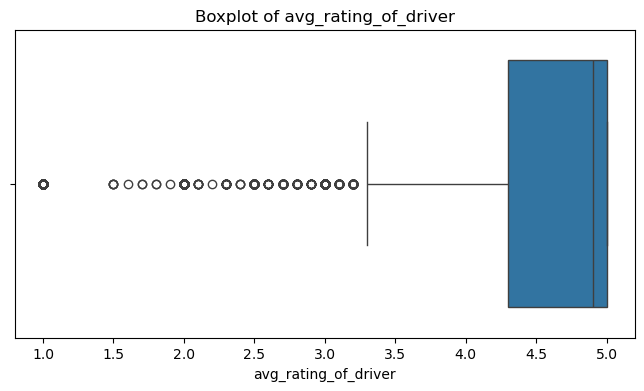

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=ultimate_data['avg_rating_of_driver'])
plt.title("Boxplot of avg_rating_of_driver")
plt.show()

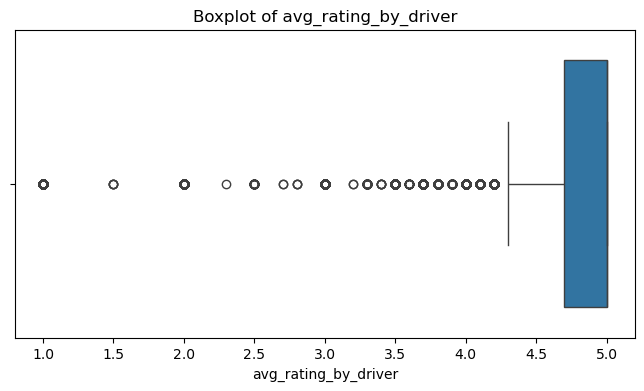

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=ultimate_data['avg_rating_by_driver'])
plt.title("Boxplot of avg_rating_by_driver")
plt.show()

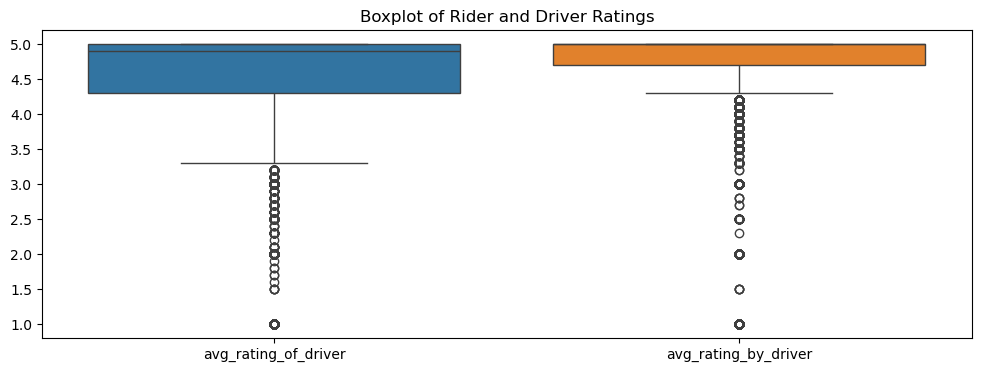

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.boxplot(data=ultimate_data[['avg_rating_of_driver', 'avg_rating_by_driver']])
plt.title("Boxplot of Rider and Driver Ratings")
plt.show()

In [80]:
Q1 = ultimate_data['avg_rating_of_driver'].quantile(0.25)  # 4.3
Q3 = ultimate_data['avg_rating_of_driver'].quantile(0.75)  # 5.0
IQR = Q3 - Q1                                  # 0.7

# Define bounds
lower_bound = Q1 - 1.5 * IQR  # ~3.25
upper_bound = Q3 + 1.5 * IQR  # ~6.05

# Flag outliers
outliers = ultimate_data[(ultimate_data['avg_rating_of_driver'] < lower_bound) | (ultimate_data['avg_rating_of_driver'] > upper_bound)]
print(f"Outliers in avg_rating_of_driver: {len(outliers)}")

Outliers in avg_rating_of_driver: 1796


In [81]:
Q1 = ultimate_data['avg_rating_by_driver'].quantile(0.25)  # 4.7
Q3 = ultimate_data['avg_rating_by_driver'].quantile(0.75)  # 5.0
IQR = Q3 - Q1                                  # 0.3

lower_bound = Q1 - 1.5 * IQR  # ~4.25
upper_bound = Q3 + 1.5 * IQR  # ~5.45

outliers = ultimate_data[(ultimate_data['avg_rating_by_driver'] < lower_bound) | (ultimate_data['avg_rating_by_driver'] > upper_bound)]
print(f"Outliers in avg_rating_by_driver: {len(outliers)}")

Outliers in avg_rating_by_driver: 3950


In [83]:
# There are Outliers, so we mark and make them as a separate column.

ultimate_data['low_driver_rating'] = ultimate_data['avg_rating_of_driver'] < 3.25
ultimate_data['low_rider_rating'] = ultimate_data['avg_rating_by_driver'] < 4.25

In [84]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,low_driver_rating,low_rider_rating
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,False,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,False,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,False


<Axes: xlabel='retained', ylabel='avg_rating_of_driver'>

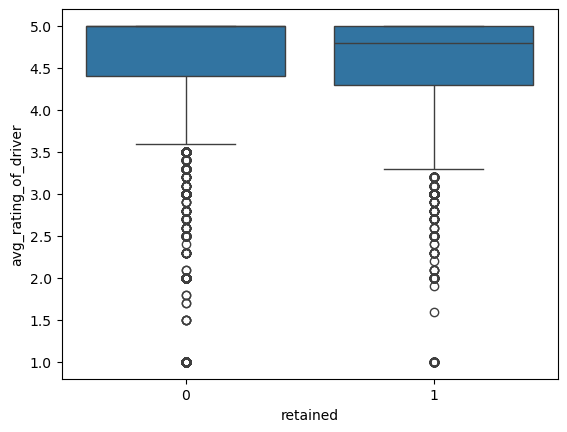

In [95]:
# Plotting based on retention

sns.boxplot(x='retained', y='avg_rating_of_driver', data=ultimate_data)

In [89]:
# Encode all Binary columns

binary_columns = ultimate_data.select_dtypes(include='bool').columns
ultimate_data[binary_columns] = ultimate_data[binary_columns].astype(int)

In [90]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,low_driver_rating,low_rider_rating,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=['city', 'phone'], drop_first=True)

In [91]:
ultimate_data['city'].value_counts()

city
Winterfell        23336
Astapor           16534
King's Landing    10130
Name: count, dtype: int64

In [97]:
# Imputing missing values of phone with phone_
ultimate_data['phone'] = ultimate_data['phone'].replace(np.nan,'phone_')

In [98]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,low_driver_rating,low_rider_rating,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,0,0


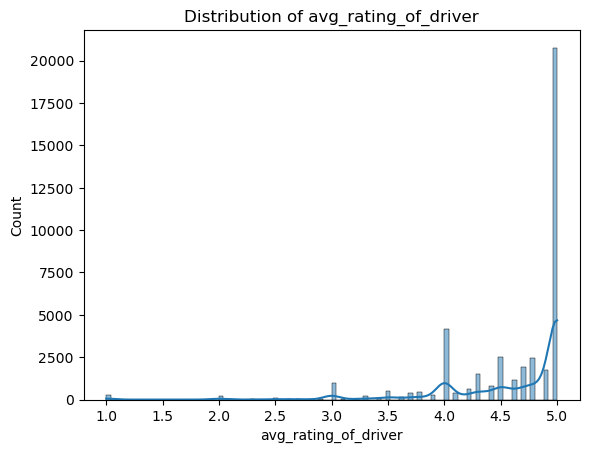

In [100]:
#Visualize Skewness avg_rating_of_driver
sns.histplot(ultimate_data['avg_rating_of_driver'], kde=True)
plt.title("Distribution of avg_rating_of_driver")
plt.show()

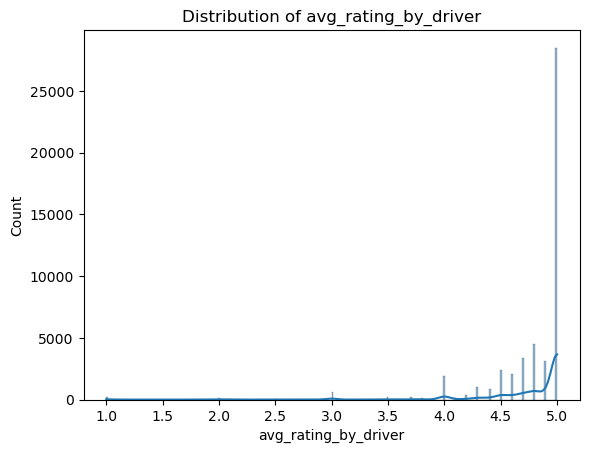

In [101]:
sns.histplot(ultimate_data['avg_rating_by_driver'], kde=True)
plt.title("Distribution of avg_rating_by_driver")
plt.show()

In [104]:
# imputing with mode because of Right tail and also outliers
ultimate_data['avg_rating_of_driver'] = ultimate_data['avg_rating_of_driver'].fillna(ultimate_data['avg_rating_of_driver'].median())
ultimate_data['avg_rating_by_driver'] = ultimate_data['avg_rating_by_driver'].fillna(ultimate_data['avg_rating_by_driver'].median())


In [105]:
# Encode categorical features
ultimate_data['ultimate_black_user'] = ultimate_data['ultimate_black_user'].astype(int)
ultimate_data = pd.get_dummies(ultimate_data, columns=['city', 'phone'], drop_first=True)

In [106]:
# Retention rate
retention_rate = ultimate_data['retained'].mean()
print(f"Retention rate: {retention_rate:.2%}")

Retention rate: 36.62%


# 2.Model Prediction

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Prepare features
X = ultimate_data.drop(columns=['signup_date', 'last_trip_date', 'retained'])
y = ultimate_data['retained']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Evaluate
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      6338
           1       0.67      0.50      0.57      3662

    accuracy                           0.73     10000
   macro avg       0.71      0.68      0.68     10000
weighted avg       0.72      0.73      0.72     10000

AUC: 0.7716131957612997


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  g

In [109]:
# Train model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      6338
           1       0.73      0.65      0.69      3662

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.78      0.78      0.78     10000

AUC: 0.8537009609235013


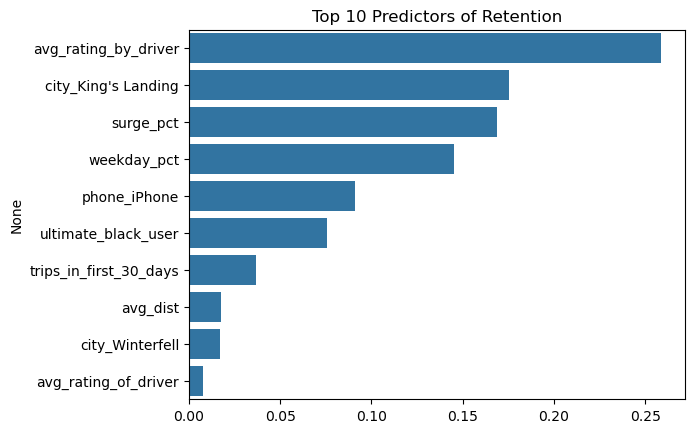

In [115]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.title("Top 10 Predictors of Retention")
plt.show()

In [113]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6338
           1       0.74      0.66      0.70      3662

    accuracy                           0.79     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.79      0.79      0.79     10000

AUC: 0.857289581157165


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


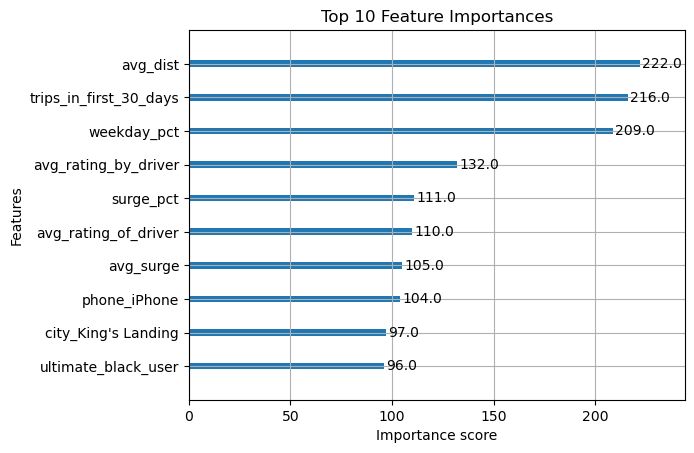

In [114]:
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()